In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [49]:
# Data\MT-KBH-004\final\GAS-002-exp_perssure_data.xlsx
# Data\MT-KBH-004\final\GAS-003-exp_perssure_data.xlsx
# Data\MT-KBH-004\final\GAS-004-exp_perssure_data.xlsx



# merge xlsx files

df_list = []
for i in range(2, 5):
    df = pd.read_excel(f"./final/GAS-00{i}-exp_perssure_data.xlsx", index_col=0)
    df_list.append(df)
    
df = pd.concat(df_list)
df.sort_index(inplace=True)
df.to_excel(f"./final/GAS-004-full-exp_perssure_data.xlsx")

# Data\MT-KBH-004\final\GAS-002-exp_pressure_data.pkl
# Data\MT-KBH-004\final\GAS-003-exp_pressure_data.pkl
# Data\MT-KBH-004\final\GAS-004-exp_pressure_data.pkl

# merge dicts
big_dict = {}
for i in range(2, 5):
    with open(f"./final/GAS-00{i}-exp_pressure_data.pkl", "rb") as f:
        data = pickle.load(f)
        big_dict.update(data)
        
with open(f"./final/GAS-004-full-exp_pressure_data.pkl", "wb") as f:
    pickle.dump(big_dict, f)
    
big_dict.keys()

# read all the files from disc
df = pd.read_excel(f"./final/GAS-004-full-exp_perssure_data.xlsx", index_col=0)
with open(f"./final/GAS-004-full-exp_pressure_data.pkl", "rb") as f:
    big_dict = pickle.load(f)
    
df

,experiment_number,pressure_a_mean,pressure_a_std,pressure_b_mean,pressure_b_std,pressure_c_mean,pressure_c_std,pressure_d_mean,pressure_d_std,pressure_air_mean,pressure_air_std,flowrate_air_mean,flowrate_air_std,_runtime_mean,_runtime_std
0,0,0.193237,0.196778,2.781250,0.029670,0.195801,0.205892,2.806641,0.029749,8.226562,0.001830,2.320312,0.000000,inf,0.000000
1,1,0.667480,0.095739,5.347656,0.017143,0.648926,0.092927,5.359375,0.016320,4.054688,0.005039,1.089844,0.000000,222.250,0.136811
2,2,0.418701,0.075948,4.093750,0.039391,0.389404,0.078409,4.121094,0.039277,6.937500,0.002413,1.929688,0.000000,inf,0.000000
3,3,0.541016,0.139215,4.890625,0.023250,0.534180,0.141453,4.906250,0.022231,6.046875,0.003306,1.660156,0.000147,230.875,0.152409
4,4,0.387695,0.048804,4.437500,0.155810,0.391113,0.046699,4.472656,0.156114,5.343750,0.007167,1.469727,0.000599,219.125,0.130491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,0.289551,0.201412,4.539062,0.197504,0.324463,0.211061,4.589844,0.197128,6.000000,0.007828,1.600586,0.000647,219.500,0.130837
98,98,0.663086,0.103369,5.433594,0.043696,0.661133,0.099335,5.464844,0.043379,5.167969,0.005158,1.349609,0.000543,216.625,0.124351
99,99,0.292480,0.204508,4.496094,0.192767,0.320801,0.214612,4.546875,0.193084,6.003906,0.007609,1.600586,0.000682,220.250,0.132023
100,100,0.653320,0.099776,5.398438,0.044478,0.652344,0.088698,5.433594,0.044303,5.167969,0.004571,1.349609,0.000313,216.500,0.124206


In [50]:


import matplotlib.pyplot as plt

# Adjusted featurize function to use with example big_dict
def featurize(key):
    x = big_dict[key]["_runtime"]
    y = big_dict[key]["pressure_a"]
    y_smooth = pd.Series(y).rolling(window=10, closed="left").mean().fillna(method="bfill")

    # After 120s
    section = x > 120
    x = x[section]
    y = y[section]
    y_smooth = y_smooth[section].values  # Adjusting for simplicity

    # Normalize
    y_smooth = (y_smooth - y_smooth.min()) / (y_smooth.max() - y_smooth.min())

    # x from 0 to 1 (not used further here, but kept for completeness)
    x = (x - x.min()) / (x.max() - x.min())

    # Resample so all len(x) = 100 (assuming this is desired)
    num_points = 200  # Adjust as needed
    if len(y_smooth) > num_points:
        y_smooth = y_smooth[::int(len(y_smooth)/num_points)]
    return y_smooth[:num_points]  # Ensure only 100 points are returned

# Collect y_smooth values for each key
y_smooth_values = [featurize(key) for key in big_dict.keys()]

# Assuming each y_smooth array has the same length, convert to DataFrame
df_y_smooth = pd.DataFrame(y_smooth_values)

features = df_y_smooth
# for key in list(big_dict.keys())[::20]:
#     y_smooth = featurize(key)
#     # plt.plot(x, y, label="raw")
#     plt.plot(y_smooth, label="smooth")
#     plt.title(key)
#     plt.legend()
#     plt.show()
    
features.head()

C:\Users\queim\AppData\Local\Temp\ipykernel_22404\2902726602.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_smooth = pd.Series(y).rolling(window=10, closed="left").mean().fillna(method="bfill")


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.208611,0.205582,0.192459,0.197608,0.205128,0.202352,0.193671,0.201847,0.218504,0.231173,...,0.452756,0.464466,0.482637,0.503533,0.520493,0.538966,0.547446,0.557541,0.566525,0.579649
1,0.163745,0.128545,0.106041,0.083538,0.057265,0.030992,0.020661,0.010331,0.000000,0.010557,...,0.939178,0.941049,0.942919,0.944790,0.944563,0.944337,0.944110,0.948815,0.953746,0.958678
2,0.307239,0.298730,0.263889,0.222687,0.189995,0.132090,0.075662,0.046015,0.031237,0.014219,...,0.788352,0.775006,0.775364,0.786919,0.799906,0.819073,0.840480,0.857498,0.883204,0.907029
3,0.190367,0.203364,0.206613,0.209862,0.222477,0.235092,0.254205,0.273318,0.270069,0.266820,...,0.242928,0.245795,0.273891,0.301988,0.343081,0.384174,0.409786,0.435398,0.461009,0.490252
4,0.204563,0.178118,0.125227,0.078558,0.061274,0.061447,0.059200,0.051508,0.028865,0.000000,...,0.571861,0.573762,0.570478,0.588108,0.617492,0.623714,0.624406,0.621813,0.610060,0.564428


In [51]:
df_xy = pd.read_excel("./final/xy/xy_bg_sub.xlsx")
df_xy

,2theta,4EXP0_bg_subtracted.xy,4EXP100_bg_subtracted.xy,4EXP101_bg_subtracted.xy,4EXP10_bg_subtracted.xy,4EXP11_bg_subtracted.xy,4EXP12_bg_subtracted.xy,4EXP13_bg_subtracted.xy,4EXP14_bg_subtracted.xy,4EXP15_bg_subtracted.xy,...,4EXP91_bg_subtracted.xy,4EXP92_bg_subtracted.xy,4EXP93_bg_subtracted.xy,4EXP94_bg_subtracted.xy,4EXP95_bg_subtracted.xy,4EXP96_bg_subtracted.xy,4EXP97_bg_subtracted.xy,4EXP98_bg_subtracted.xy,4EXP99_bg_subtracted.xy,4EXP9_bg_subtracted.xy
0,10.0015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,10.0318,1.535,-0.618,0.703,0.976,0.133,-0.991,-0.466,1.028,-0.426,...,0.722,-0.085,2.137,0.867,3.842,-1.276,-0.357,-0.837,0.832,0.270
2,10.0620,1.665,0.265,-0.469,-0.443,0.996,-0.956,-0.100,13.255,0.187,...,4.882,-0.065,3.389,0.015,4.767,-0.013,-0.209,-0.809,-0.106,0.228
3,10.0923,1.169,0.940,0.026,0.481,1.391,-0.322,-0.358,5.013,-0.345,...,2.635,0.163,7.245,0.153,11.630,-0.729,0.305,0.153,0.935,0.968
4,10.1226,2.914,-0.103,0.052,-0.104,1.160,-1.458,0.426,4.687,0.582,...,5.858,-0.598,13.446,1.124,21.618,-0.017,-0.067,0.594,-0.471,-0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,119.8827,0.002,0.068,-0.205,-0.017,-0.004,0.497,-0.115,0.292,0.528,...,0.122,0.055,0.847,-0.337,0.441,-0.256,0.160,0.244,0.140,0.311
3630,119.9130,0.210,-0.337,0.146,-0.165,0.418,-0.173,-0.074,-0.016,-0.243,...,-0.244,-0.080,0.596,0.254,-0.021,-0.260,0.159,0.469,-0.362,-0.016
3631,119.9433,-0.363,0.070,-0.337,-0.260,-0.253,-0.165,-0.084,0.250,0.289,...,-0.337,-0.214,-0.019,0.169,0.246,-0.157,-0.258,0.590,-0.068,-0.290
3632,119.9735,-0.188,0.061,-0.012,-0.280,-0.195,-0.202,0.322,0.307,0.196,...,0.248,-0.244,0.459,0.189,0.097,0.312,-0.156,-0.122,0.018,-0.015


C:\Users\queim\AppData\Local\Temp\ipykernel_22404\640474964.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_smooth = pd.Series(y).rolling(window=20, closed="left").mean().fillna(method="bfill")


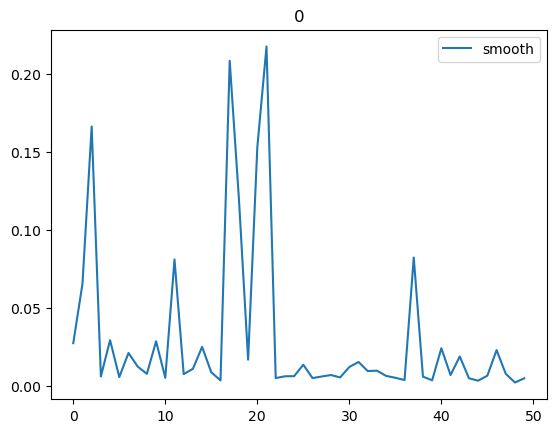

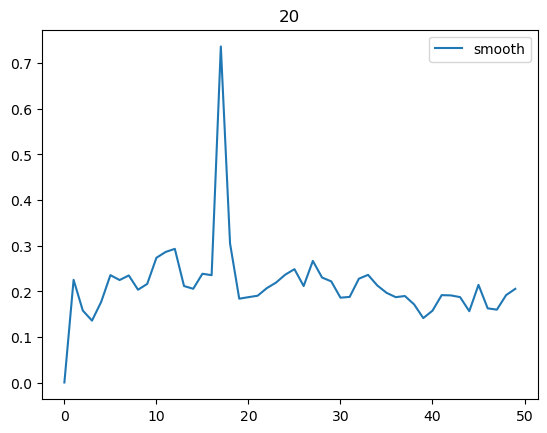

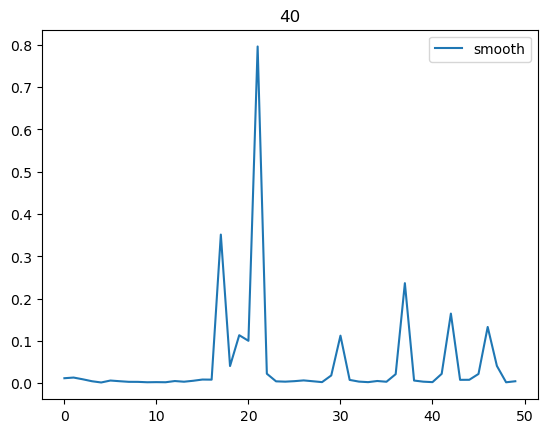

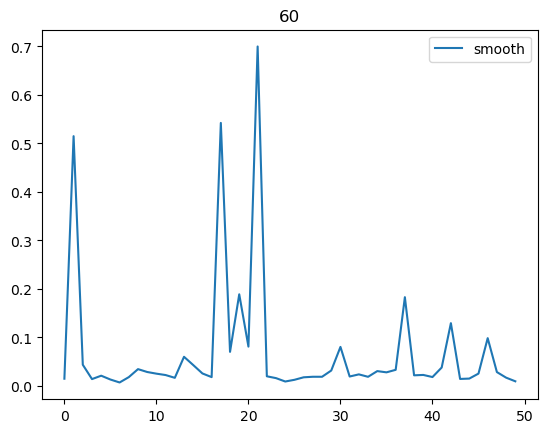

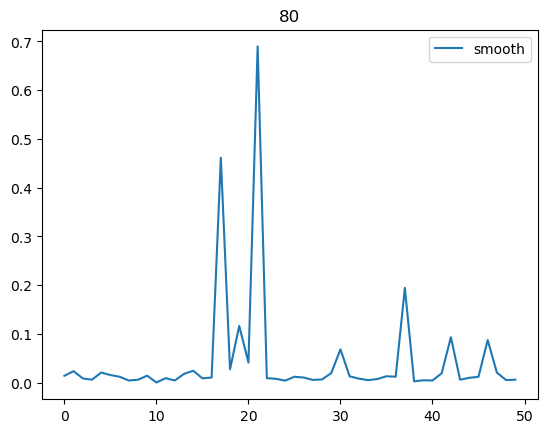

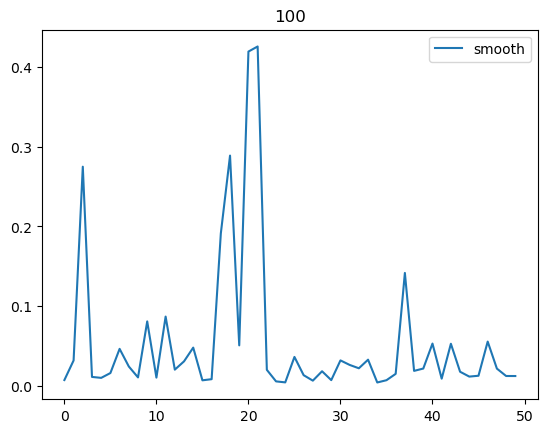

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.027325,0.065358,0.166163,0.005970,0.029254,0.005571,0.021040,0.012333,0.007667,0.028540,...,0.024096,0.006881,0.018797,0.004825,0.003286,0.006510,0.022883,0.007672,0.002130,0.004813
1,0.000266,0.099936,0.003693,0.009093,0.007838,0.008617,0.010617,0.009562,0.009151,0.006552,...,0.004451,0.016093,0.149965,0.004476,0.003384,0.010603,0.116916,0.035311,0.008632,0.010155
2,0.110071,0.666158,0.508192,0.024623,0.000839,0.007783,0.006126,0.028967,0.005065,0.004438,...,0.003345,0.016064,0.012933,0.007295,0.004019,0.003698,0.004726,0.005428,0.004694,0.003528
3,0.000450,0.013698,0.006116,0.009327,0.005235,0.003102,0.009068,0.002645,0.006300,0.003003,...,0.003078,0.016463,0.132628,0.004026,0.002538,0.009826,0.104927,0.034250,0.004579,0.006066
4,0.161720,0.834074,0.318497,0.004995,0.006508,0.009161,0.002784,0.029611,0.001349,0.002733,...,0.002115,0.010584,0.011377,0.005233,0.004017,0.003027,0.002865,0.003023,0.003692,0.003289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.014702,0.035339,0.038342,0.022743,0.017711,0.009552,0.004509,0.012394,0.018714,0.009430,...,0.007936,0.009062,0.082431,0.004776,0.013202,0.007981,0.083919,0.026739,0.003082,0.008833
98,0.010893,0.039419,0.181562,0.002085,0.026447,0.022482,0.030641,0.019615,0.013087,0.063917,...,0.037481,0.013561,0.084353,0.013256,0.014767,0.005521,0.085744,0.018473,0.014552,0.008243
99,0.017677,0.027497,0.019320,0.017548,0.014109,0.017324,0.019328,0.017254,0.011193,0.013396,...,0.006804,0.012462,0.093060,0.016482,0.011396,0.006775,0.076524,0.026775,0.013881,0.020465
100,0.007252,0.031820,0.274950,0.011164,0.009989,0.016048,0.046385,0.024276,0.010560,0.080824,...,0.053021,0.008995,0.052782,0.017664,0.011593,0.012649,0.055504,0.021605,0.012337,0.012291


In [52]:
xrd_df = df_xy.set_index("2theta")
# convert to numeric
xrd_df.columns = [pd.to_numeric(col.replace("4EXP", "").split("_")[0], errors='coerce') for col in xrd_df.columns]
xrd_df.sort_index(axis=1, inplace=True)
# 2theta	4EXP0	4EXP100	4EXP101	4EXP10	4EXP11	4EXP12	4EXP13	4EXP14	4EXP15	...	4EXP91	4EXP92	4EXP93	4EXP94	4EXP95	4EXP96	4EXP97	4EXP98	4EXP99	4EXP9
xrd_df
def featurize(key):
    
    x = xrd_df.index
    section = x < 75
    y = xrd_df[key]
    y_smooth = pd.Series(y).rolling(window=20, closed="left").mean().fillna(method="bfill")
    
    #binary smooth
    

    # After 120s
    y = y[section]
    y_smooth = y_smooth[section].values  # Adjusting for simplicity

    # Normalize
    y_smooth = (y_smooth - y_smooth.min()) / (y_smooth.max() - y_smooth.min())

    # x from 0 to 1 (not used further here, but kept for completeness)
    x = (x - x.min()) / (x.max() - x.min())

    # Resample so all len(x) = 100 (assuming this is desired)
    num_points = 50  # Adjust as needed
    if len(y_smooth) > num_points:
        y_smooth = y_smooth[::int(len(y_smooth)/num_points)]
    return y_smooth[:num_points]  # Ensure only 100 points are returned

# Collect y_smooth values for each key
y_smooth_values = [featurize(key) for key in xrd_df.columns]
y_smooth_values

df_y_smooth = pd.DataFrame(y_smooth_values)

for key in list(xrd_df.columns)[::20]:
    y_smooth = featurize(key)
    # plt.plot(x, y, label="raw")
    plt.plot(y_smooth, label="smooth")
    plt.title(key)
    plt.legend()
    plt.show()

xrd_features = df_y_smooth
xrd_features
# features = xrd_features

In [53]:
experiments = pd.read_excel("./final/XRD+synthsis_data.xlsx")
experiments.dropna(how="any", axis=1, inplace=True)
experiments.set_index("experiment_number", inplace=True)
experiments.sort_index(inplace=True)
experiments.columns
# 'Sample ID', 'id', 'repeat', 'pH', 'Cond', 'C_ZnCl', 'C_NaOH/C_ZnCl',
#        'C_NaOH', 'Q_AC', 'Q_AIR', 'N_ZnO', 'End', 'Int. 1', 'Int. 2', 'Int. 3',
#        'Int. 4', '2theta 1', '2theta 2', '2theta 3', '2theta 4', 'Peak Ratio',
#        'Rwp', '00n Size', 'Isotropic Size', 'Aspect Ratio', 'pressure_a_mean',
#        'pressure_a_std', 'pressure_b_mean', 'pressure_b_std',
#        'pressure_air_mean', 'pressure_air_std'
# add std via transform groupby id
# for coloumns: pH, Cond, Aspect Ratio, Peak Ratio, 
# experiments["pH_std"] = experiments.groupby("id")["pH"].transform("std")
# experiments["pH_std"]
for col in ["pH", "Cond", "Aspect Ratio", "Peak Ratio"]:
    experiments[f"{col}_std"] = experiments.groupby("id")[col].transform("std")

C:\Users\queim\AppData\Local\Temp\ipykernel_22404\4121172664.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(labels))


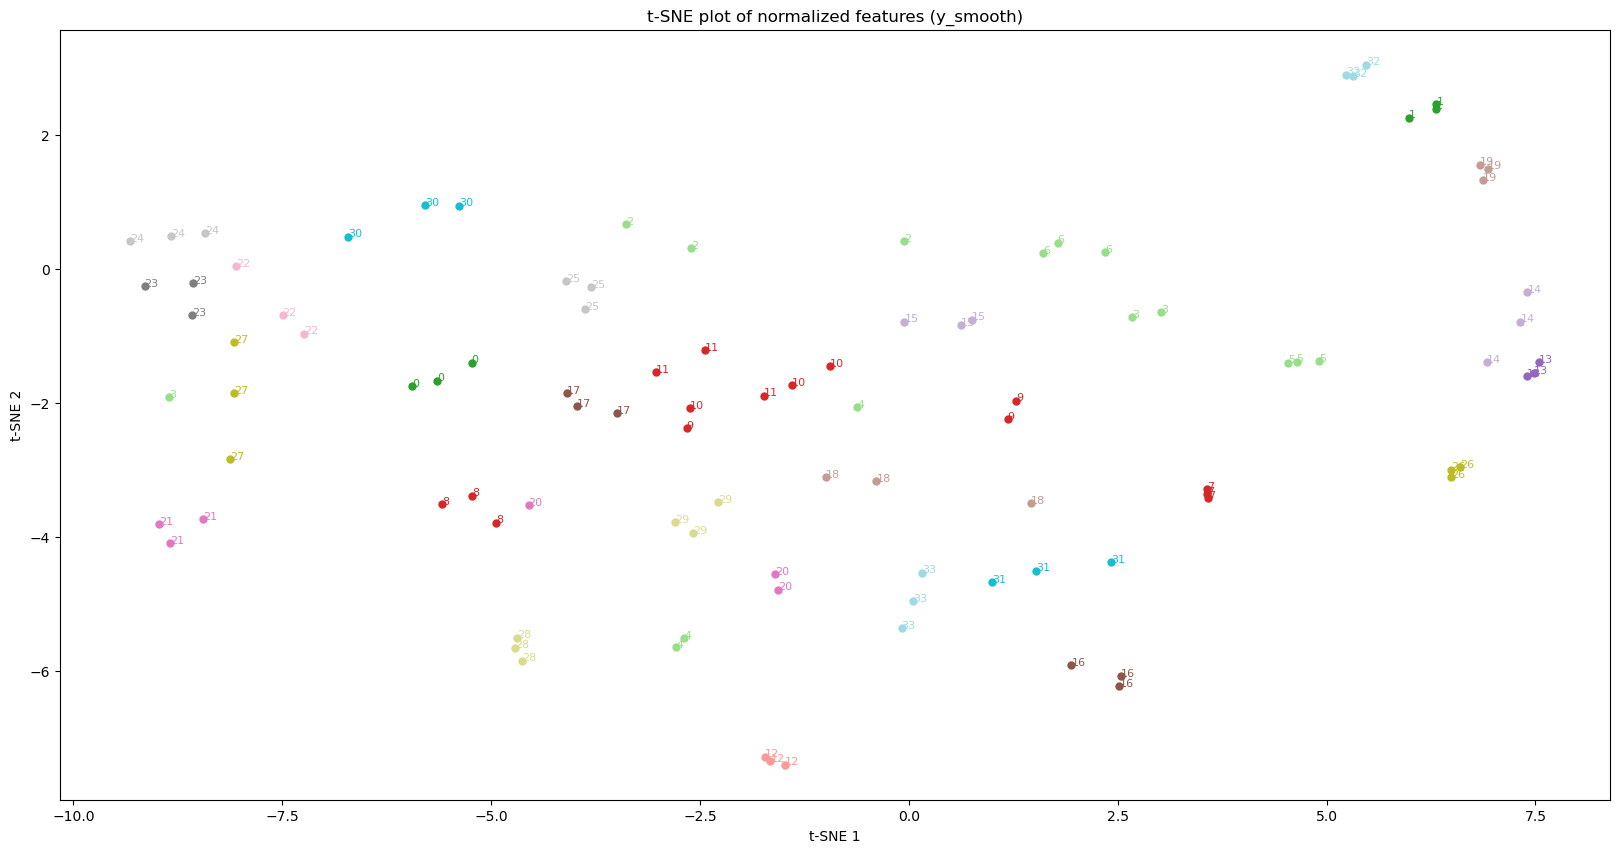

In [54]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming df_y_smooth is already defined
['Sample ID', 'id', 'repeat', 'pH', 'Cond', 'C_ZnCl', 'C_NaOH/C_ZnCl',
       'C_NaOH', 'Q_AC', 'Q_AIR', 'N_ZnO', 'End', 'Int. 1', 'Int. 2', 'Int. 3',
       'Int. 4', '2theta 1', '2theta 2', '2theta 3', '2theta 4', 'Peak Ratio',
       'Rwp', '00n Size', 'Isotropic Size', 'Aspect Ratio', 'pressure_a_mean',
       'pressure_a_std', 'pressure_b_mean', 'pressure_b_std',
       'pressure_air_mean', 'pressure_air_std']

# features = experiments[["C_ZnCl", "C_NaOH/C_ZnCl", "C_NaOH", "Q_AC", "Q_AIR", "N_ZnO", "End", ]]

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

tsne_results = tsne.fit_transform(features)

labels = experiments["id"].values
# cmap one color per label
cmap = plt.cm.get_cmap('tab20', len(labels))
colors = {label: cmap(i) for i, label in enumerate(labels)}

# Plotting
plt.figure(figsize=(20, 10))
for i, label in enumerate(labels):
    plt.plot(tsne_results[i, 0], tsne_results[i, 1], label=label, marker="o", linestyle="", markersize=5, color=colors[label])
    plt.text(tsne_results[i, 0], tsne_results[i, 1], label, fontsize=8, color=colors[label])

plt.title('t-SNE plot of normalized features (y_smooth)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()




In [55]:
experiments.columns.to_list()

['Sample ID',
 'id',
 'repeat',
 'pH',
 'Cond',
 'C_ZnCl',
 'C_NaOH/C_ZnCl',
 'C_NaOH',
 'Q_AC',
 'Q_AIR',
 'N_ZnO',
 'End',
 'Int. 1',
 'Int. 2',
 'Int. 3',
 'Int. 4',
 '2theta 1',
 '2theta 2',
 '2theta 3',
 '2theta 4',
 'Peak Ratio',
 'Rwp',
 '00n Size',
 'Isotropic Size',
 'Aspect Ratio',
 'pressure_a_mean',
 'pressure_a_std',
 'pressure_b_mean',
 'pressure_b_std',
 'pressure_air_mean',
 'pressure_air_std',
 'pH_std',
 'Cond_std',
 'Aspect Ratio_std',
 'Peak Ratio_std']

C:\Users\queim\AppData\Local\Temp\ipykernel_22404\1831656999.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_labels))


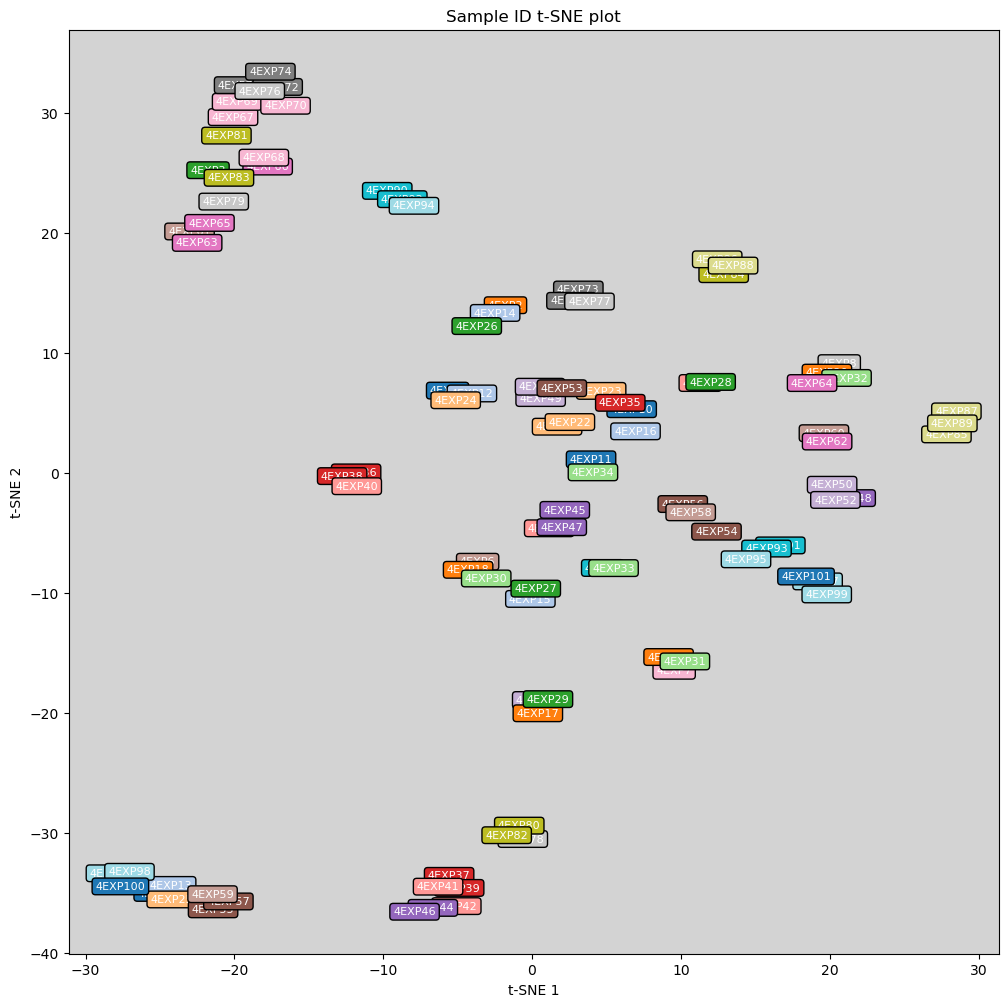

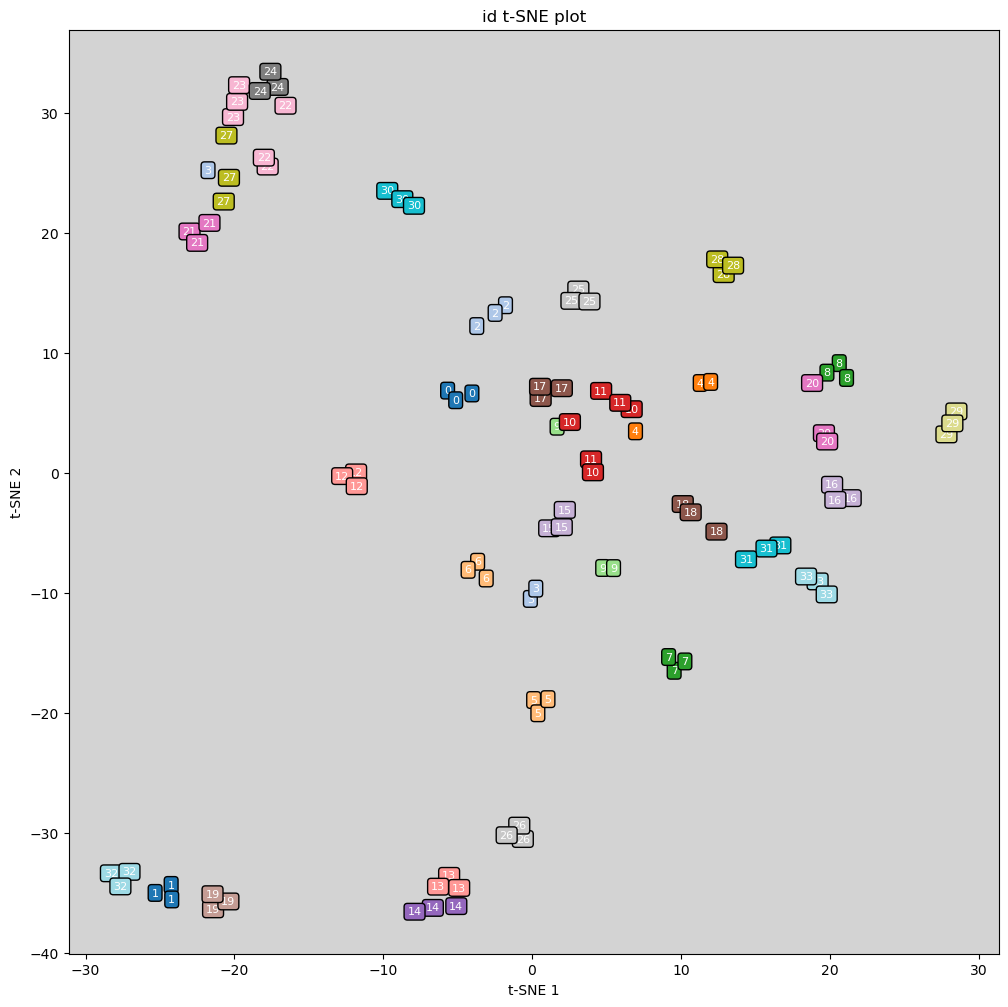

In [56]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=6)
feats = features
tsne_results = tsne.fit_transform(feats,)


# Assuming tsne_results is already defined

# Create a function to determine if a column is float-valued
def is_float_column(column):
    return experiments[column].dtype in [np.float64, np.float32]

# Loop through each column and create a t-SNE plot

for column in experiments.columns[:2]:
    plt.figure(figsize=(12,12))
    labels = experiments[column].values
    
    if is_float_column(column):
        # Use a continuous colormap for float-valued columns
        norm = plt.Normalize(labels.min(), labels.max())
        cmap = plt.cm.viridis
        colors = cmap(norm(labels))
        labels = labels.round(2)
    else:
        # Use distinct colors for category or integer-valued columns
        unique_labels = np.unique(labels)
        cmap = plt.cm.get_cmap('tab20', len(unique_labels))
        colors_dict = {label: cmap(i) for i, label in enumerate(unique_labels)}
        colors = np.array([colors_dict[label] for label in labels])
    
    for i, label in enumerate(labels):
        plt.scatter(tsne_results[i, 0], tsne_results[i, 1], color=colors[i], edgecolor='black')
        plt.text(tsne_results[i, 0], tsne_results[i, 1], str(label), fontsize=8,
                 color="white", ha="center", va="center", bbox=dict(facecolor=colors[i], edgecolor="black", boxstyle="round,pad=0.3"))
    
    plt.title(f'{column} t-SNE plot')
    plt.gca().set_facecolor('lightgray')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()


In [57]:
features

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.208611,0.205582,0.192459,0.197608,0.205128,0.202352,0.193671,0.201847,0.218504,0.231173,...,0.452756,0.464466,0.482637,0.503533,0.520493,0.538966,0.547446,0.557541,0.566525,0.579649
1,0.163745,0.128545,0.106041,0.083538,0.057265,0.030992,0.020661,0.010331,0.000000,0.010557,...,0.939178,0.941049,0.942919,0.944790,0.944563,0.944337,0.944110,0.948815,0.953746,0.958678
2,0.307239,0.298730,0.263889,0.222687,0.189995,0.132090,0.075662,0.046015,0.031237,0.014219,...,0.788352,0.775006,0.775364,0.786919,0.799906,0.819073,0.840480,0.857498,0.883204,0.907029
3,0.190367,0.203364,0.206613,0.209862,0.222477,0.235092,0.254205,0.273318,0.270069,0.266820,...,0.242928,0.245795,0.273891,0.301988,0.343081,0.384174,0.409786,0.435398,0.461009,0.490252
4,0.204563,0.178118,0.125227,0.078558,0.061274,0.061447,0.059200,0.051508,0.028865,0.000000,...,0.571861,0.573762,0.570478,0.588108,0.617492,0.623714,0.624406,0.621813,0.610060,0.564428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.355273,0.397708,0.439988,0.482267,0.536162,0.590057,0.602912,0.615766,0.574570,0.533375,...,0.363481,0.367353,0.364720,0.362088,0.365650,0.369212,0.380517,0.391823,0.393062,0.394301
98,0.056179,0.037538,0.031203,0.024868,0.018534,0.013322,0.013636,0.013950,0.014264,0.047953,...,0.934851,0.935909,0.937560,0.939212,0.940864,0.945555,0.948859,0.952163,0.955466,0.958506
99,0.392598,0.428226,0.459530,0.490834,0.505016,0.519198,0.544967,0.570737,0.596506,0.580595,...,0.375649,0.414044,0.436700,0.459357,0.482013,0.481840,0.496368,0.510896,0.525424,0.541508
100,0.059225,0.049178,0.039130,0.023820,0.015880,0.007940,0.000000,0.015848,0.031696,0.050222,...,0.917453,0.918281,0.918536,0.918791,0.918027,0.917262,0.919939,0.922616,0.925484,0.928353


In [58]:

import altair as alt
import pandas as pd
import panel as pn

df = experiments
df["tsne_1"] = tsne_results[:, 0]
df["tsne_2"] = tsne_results[:, 1]
alt.data_transformers.disable_max_rows()
pn.extension("vega")
def plot():
    color = pn.widgets.Select(
        name="Color", options=list(df.columns), value="pH"
    )
    # Assuming 'id' is present in df for symbol encoding
    id_column = "id"  # Specify the column name for id if different

    brush = alt.selection_interval(name="brush")  # selection of type "interval"


    # Since this script includes dynamic interaction, ensure `filtered_table` function logic aligns with your data analysis goals
    def filtered_table(selection):
        if not selection:
            return df.iloc[:0]
        query = " & ".join(
            f"{crange[0]:.3f} <= `{col}` <= {crange[1]:.3f}"
            for col, crange in selection.items()
        )
        return df.query(query)


    def create_chart(color=color.value, id_column=id_column):
        chart = (
            alt.Chart(df)
            .mark_point()
            .encode(
                x=alt.X(f"tsne_1:Q", scale=alt.Scale(zero=False)),
                y=alt.Y(f"tsne_2:Q", scale=alt.Scale(zero=False)),
                color=alt.Color(
                    f"{color}:Q",
                    scale=alt.Scale(scheme="viridis"),
                    legend=alt.Legend(title=color),
                ),
            )
            .properties(width=600, height=600)
            .add_params(brush)
        )
        return chart


    vega_pane = pn.pane.Vega(debounce=10)


    @pn.depends(color.param.value, watch=True)
    def update_chart(color):
        vega_pane.object = create_chart(color, id_column)


    # Initialize chart
    update_chart(color.value)

    vega_pane_2 = pn.pane.Vega(debounce=10)
    bind = alt.selection_interval(bind="scales")


    def create_detail_chart(selected_experiments):
        if not selected_experiments:
            return (
                alt.Chart(pd.DataFrame())
                .mark_line()
                .encode(
                    x="2theta:Q",  # Assuming 2theta is your X-axis for the detailed chart
                    y="Value:Q",  # This will be the dynamically populated Y-axis based on selected experiments
                )
                .properties(width=600, height=300, title="XRD Plot")
            )

        # Melt df_xy to make it "long" for Altair plotting
        df_long = features.reset_index().melt(
            id_vars=["2theta"],
            value_vars=selected_experiments,
            var_name="Experiment",
            value_name="Intensity",
        )

        chart = (
            alt.Chart(df_long)
            .mark_line()
            .encode(
                y=alt.Y("Intensity:Q", title="Intensity"),
                color="Experiment:N",
                tooltip=["2theta", "Intensity"],
            )
            .properties(width=600, height=300)
            .add_params(bind)
        )
        return chart


    @pn.depends(vega_pane.selection.param.brush, watch=True)
    def update_detail_chart(brush_selection):
        if brush_selection:
            selected_exp_ids = filtered_table(brush_selection)["Sample ID"].tolist()
            selected_experiments = [
                col for col in features.columns if col in selected_exp_ids
            ]
            vega_pane_2.object = create_detail_chart(selected_experiments)
        else:
            vega_pane_2.object = create_detail_chart([])


    # Ensure the initial state of the dashboard is correctly set up
    update_detail_chart(None)


    sidebar = pn.Column(
        color,
        sizing_mode="stretch_width",
    )

    main = pn.Row(
        pn.Column(
            pn.Row(
                vega_pane,
                pn.Column(
                    vega_pane_2,
                ),
            ),
            pn.pane.DataFrame(pn.bind(filtered_table, vega_pane.selection.param.brush)),
        ),
        sizing_mode="stretch_width",
    )
    
    return main, sidebar

main1, sidebar1 = plot()

template = pn.template.BootstrapTemplate(
    title="XRD Dashboard",
    header_background="#00aec9",
)
template.sidebar.append(sidebar1)
template.main.append(main1)
template.servable()

template.show()


RuntimeError: _pending_writes should be non-None when we have a document lock, and we should have the lock when the document changes

In [ ]:
55 in features.T.columns

True

c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


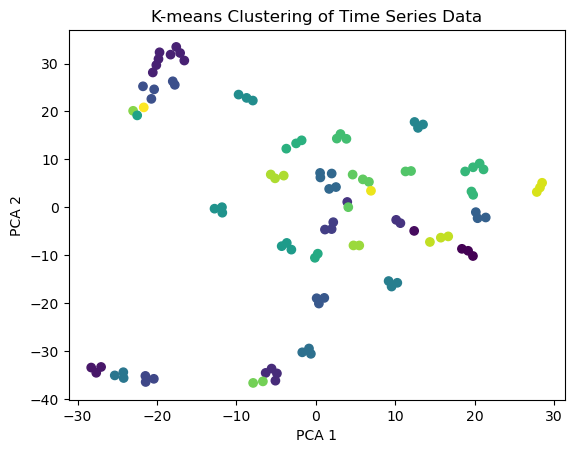

ERROR:bokeh.server.protocol_handler:error handling message
 message: Message 'PATCH-DOC' content: {'events': [{'kind': 'MessageSent', 'msg_type': 'bokeh_event', 'msg_data': {'type': 'event', 'name': 'vega_event', 'values': {'type': 'map', 'entries': [['model', {'id': '279e2605-15ef-4588-a97b-761d61f3e1d6'}], ['data', {'type': 'map', 'entries': [['type', 'brush'], ['value', {'type': 'map', 'entries': [['tsne_1', [-14.200000000000003, -14.100000000000001]], ['tsne_2', [2.533333333333335, 2.6666666666666643]]]}]]}]]}}}]} 
 error: KeyError('experiment_number')
Traceback (most recent call last):
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\pandas\core\indexes\base.py", line 3790, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObject

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = features.values  
k = experiments["id"].nunique()


kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Predict the cluster labels
labels = kmeans.labels_
# Add the cluster labels back to your original DataFrame


# Assuming you have a 2D PCA result in pca_results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering of Time Series Data')
plt.show()

